In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
model_folder='models/version_6/'
results=pickle.load(open(model_folder+'results', 'rb'))
print(results.keys())

dict_keys(['model', 'protein_centric', 'go_term_centric', 'go_class_centric'])


## Protein-centric

In [3]:
print('>>F1 max:', results['protein_centric']['f1'])
print('>>Recall:', results['protein_centric']['recall'])
print('>>Precision:', results['protein_centric']['precision'])

>>F1 max: 0.866537332766504
>>Recall: 0.83700544
>>Precision: 0.917616


Text(0, 0.5, 'F1 max')

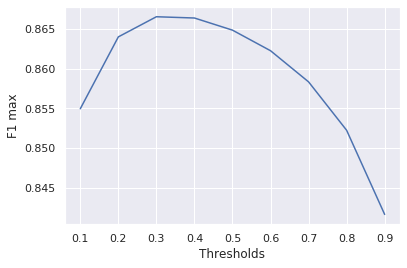

In [4]:
plt.plot([i/10 for i in range(1, 10)], results['protein_centric']['f1_list'])
plt.xlabel('Thresholds')
plt.ylabel('F1 max')

The model's performance doesn't change too much based on the threshold selected. However, the best performance is obtained with a threshold of 0.3.

## GO term-centric

Here every GO term used as labels is evaluated independently. F1 max, precision and recall are computed for each label. Then, they are display in function off the number of times that the GO term has been predicted. 

In [5]:
data=np.asarray(results['go_term_centric']['f1_counter'])

print('Total labels:', data.shape[0])
print('Number labels encountered in test dataset:', data[data!=0].shape[0])
print('Number labels not encountered in test dataset:', data[data==0].shape[0])

Total labels: 1918
Number labels encountered in test dataset: 256
Number labels not encountered in test dataset: 1662


Text(0.5, 0, 'Number examples')

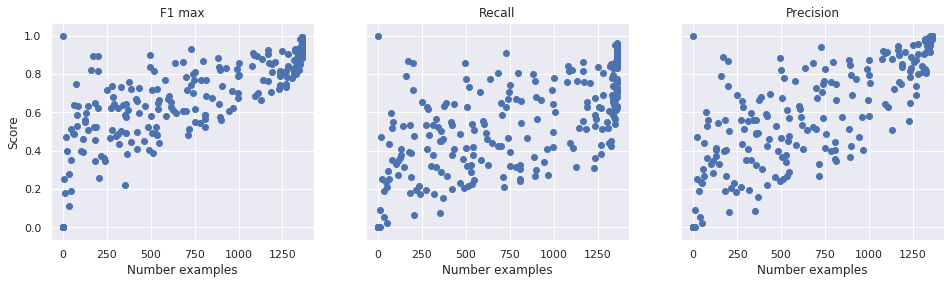

In [6]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4), sharey=True)
ax1.scatter(results['go_term_centric']['f1_counter'], results['go_term_centric']['f1'])
ax1.set_title('F1 max')
ax1.set_ylabel('Score')
ax1.set_xlabel('Number examples')

ax2.scatter(results['go_term_centric']['recall_counter'], results['go_term_centric']['recall'])
ax2.set_title('Recall')
ax2.set_xlabel('Number examples')

ax3.scatter(results['go_term_centric']['precision_counter'], results['go_term_centric']['precision'])
ax3.set_title('Precision')
ax3.set_xlabel('Number examples')


## GO class-centric

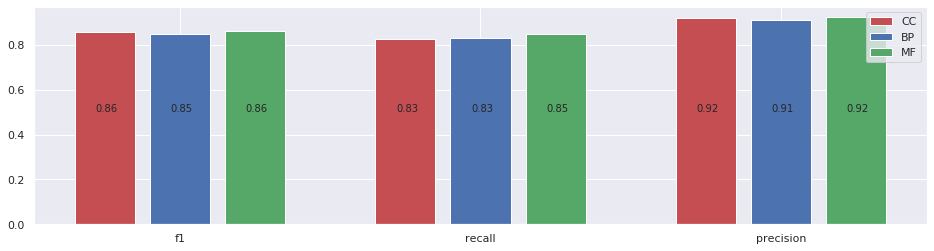

In [7]:
results_go_class={}
for key in results['go_class_centric']:
    results_go_class[key]=[]
    for values_key in results['go_class_centric'][key]:
        results_go_class[key].append(results['go_class_centric'][key][values_key])

f, ax = plt.subplots(1, 1, figsize=(16,4))

ax.bar([i for i in range(0,12,4)], results_go_class['cellular_component'], color='r', label='CC')
ax.bar([i for i in range(1,12,4)], results_go_class['biological_process'], color='b', label='BP')
ax.bar([i for i in range(2,12,4)], results_go_class['molecular_function'], color='g', label='MF')

ax.set_xticks([i for i in range(1,12,4)])
ax.set_xticklabels( [key for key in results['go_class_centric']['cellular_component']] )
ax.legend(loc=0)

for idx, key in enumerate(results_go_class):
    class_res=results_go_class[key]
    count=0
    for j in range(idx, 12, 4):
        ax.text(j-0.125, 0.5, "{:.2f}".format(class_res[count]))
        count += 1


In [15]:
#plot hyperparams
gap=25
type_plot='kde'#“scatter” | “reg” | “resid” | “kde” | “hex” 

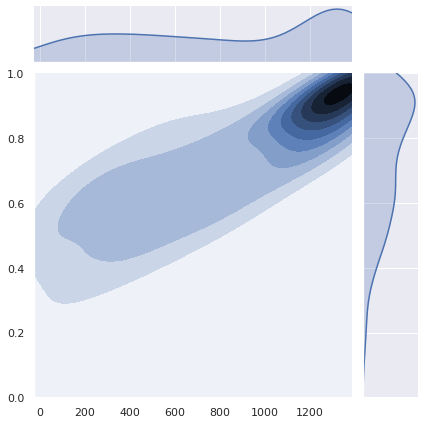

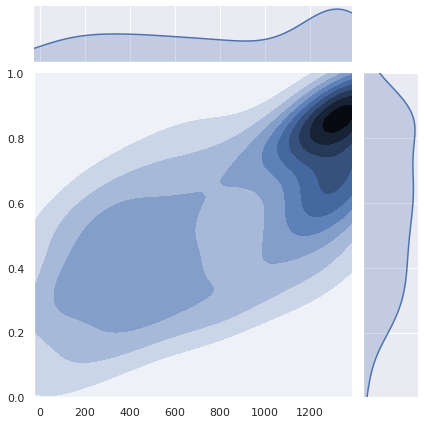

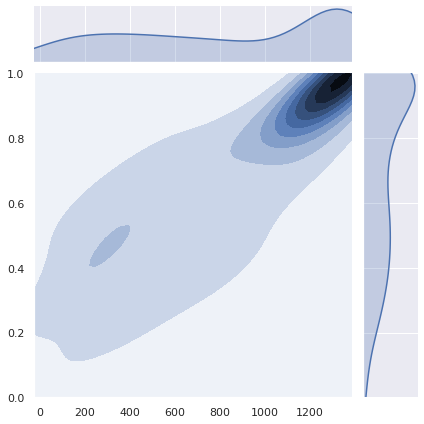

In [22]:
counters=['f1_counter', 'recall_counter', 'precision_counter']
scores_list=['f1', 'recall','precision']

for idx, counter in enumerate(counters):
    scores=scores_list[idx]
    mask=np.asarray(results['go_term_centric'][counter])>0

    results['go_term_centric'][scores]=np.asarray(results['go_term_centric'][scores])[mask]
    results['go_term_centric'][counter]=np.asarray(results['go_term_centric'][counter])[mask]
    
    sns.jointplot(x=counter, y=scores, data=results['go_term_centric'], kind=type_plot, xlim=(-gap, np.max(results['go_term_centric'][counter]+gap)), ylim=(0,1));